* Timestamp: Start time of time window (60s window), in Unix time
* Open: Open price at start time window
* High: High price at start time window
* Low: Low price at start time window
* Close: Close price at start time window

## 1. Análisis de Tendencias y Predicción de Precios

📌Paso 1: Preparación de los datos

Limpieza de datos: Verificar si hay valores faltantes o inconsistencias en las columnas Timestamp, Open, High, Low, y Close. Usamos Python con pandas para hacer esto.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('btcusd_1-min_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit= 's') # Convertir el timestamp a formato de fecha
df.dropna(inplace=True)  # Eliminar filas con valores faltantes
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


📌Paso 2: Análisis exploratorio(EDA)

Realiza un análisis descriptivo de los precios de apertura, cierre, máximo y mínimo

In [128]:
df.describe() # Estadísticas básicas

,Timestamp,Open,High,Low,Close,Volume
count,6725280,6.725280e+06,6.725280e+06,6.725280e+06,6.725280e+06,6.725280e+06
mean,2018-05-25 00:16:14.385827840,1.440961e+04,1.441585e+04,1.440319e+04,1.440964e+04,5.471728e+00
min,2012-01-01 10:01:00,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,2015-03-14 03:00:45,4.122500e+02,4.124600e+02,4.120700e+02,4.122400e+02,1.827821e-02
50%,2018-05-24 20:00:30,6.237120e+03,6.239980e+03,6.233660e+03,6.237130e+03,5.000000e-01
75%,2021-08-04 13:00:15,2.303487e+04,2.304210e+04,2.302600e+04,2.303400e+04,3.187313e+00
max,2024-12-08 00:00:00,1.036260e+05,1.036470e+05,1.036180e+05,1.036250e+05,5.853852e+03
std,NaN,1.939492e+04,1.940245e+04,1.938728e+04,1.939502e+04,2.295976e+01


* 6,725,280 registros en la base de datos.
* El primer registro en la base de datos es el 1 de enero de 2012 a las 10:01:00.
* El último registro corresponde a 8 de diciembre de 2024 a las 00:00:00.
* El precio promedio de Bitcoin en cada columna es de aproximadamente 14,400 USD 
        Open: 14,409.61 USD, High: 14,415.85 USD, Low: 14,403.19 USD, Close: 14,409.64 USD.
* El precio mínimo para todas las columnas fue de 3.80 USD.
* El precio máximo alcanzó los 103,626 USD , lo cual es una de las máximas cifras históricas alcanzadas por Bitcoin, reflejando un fuerte crecimiento en su precio en ciertos momentos.
* 25%, 50%, 75% (percentiles):
        El percentil 25 muestra que el precio estaba alrededor de 412 USD.
        El percentil 50 (mediana) muestra un precio alrededor de 6,237 USD.
        El percentil 75 muestra que el precio subió a 23,034 USD.
* std (desviación estándar): 19,395 USD, Esto indica una alta volatilidad en los precios de Bitcoin durante el período de tiempo estudiado.
* El volumen de transacciones ha tenido una gran variabilidad, con un valor promedio de 5.47 BTC por transacción, aunque la mayor parte de las transacciones parecen ser de bajo volumen.



<Axes: title={'center': 'Precio de cierre de Bitcoin'}, xlabel='Año', ylabel='Precio de bitcoin($)'>

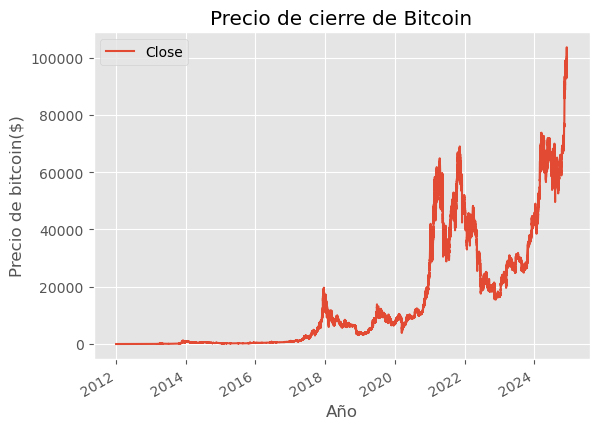

In [143]:
#Graficamos el precio de bitcoin
df.plot(x='Timestamp', y='Close', title='Precio de cierre de Bitcoin', xlabel='Año', ylabel='Precio de bitcoin($)')

📝(05 diciembre 2024) El precio de cierre superior a los 100,000 dólares por Bitcoin indica un momento significativo en el mercado, ya que representa un umbral psicológico clave para los inversores y traders:
* Hito Psicológico: Los 100,000 dólares son una barrera simbólica que podría atraer a más inversores institucionales.
* Fase de Expansión: Indica un impulso alcista si se supera después de consolidación.
* Resistencia Futura: Este nivel puede convertirse en resistencia clave si no se mantiene.
* Interés Institucional: Refleja un mayor reconocimiento de Bitcoin como activo refugio.
* Riesgo de Corrección: A pesar del optimismo, el mercado podría experimentar caídas tras un aumento rápido.

In [130]:
#Observamos la fecha 5 de diciembre de 2024 en el que 'bitcoin' alcanzó un valor de mercado superior a 100'000 dólares
df[df['Close'] >= 100000].head(1)

,Timestamp,Open,High,Low,Close,Volume
6723280,2024-12-05 07:21:00,101786.0,101831.0,101772.0,101799.0,1.250163


Análisis de la volatilidad

 Calcular la volatilidad diaria como la desviación estándar de los rendimientos.

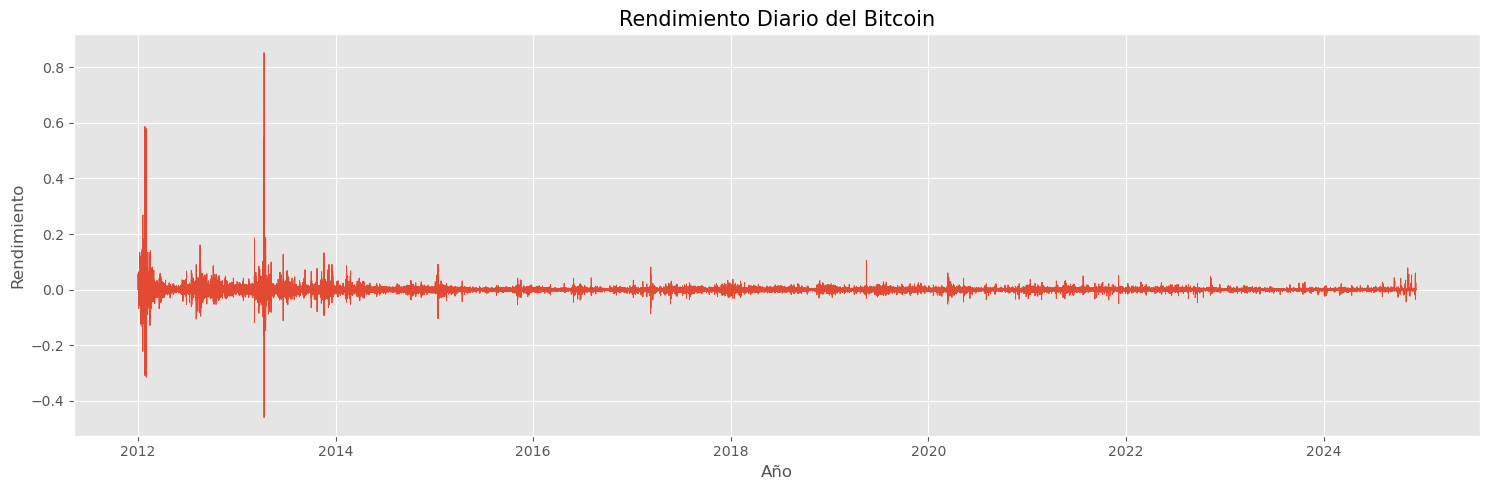

In [131]:
df['return'] = df['Close'].pct_change() # pct_change() calcula la variación porcentual entre el valor actual y el anterior

#Visualizar la volatilidad
plt.figure(figsize=(15,5))
sns.lineplot(x='Timestamp', y='return', data=df, linewidth = 0.7)
plt.title('Rendimiento Diario del Bitcoin', fontsize = 15)
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Rendimiento', fontsize = 12)

#Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Análisis de la Gráfica de Rendimiento Diario de Bitcoin

* Volatilidad inicial (2012-2013):

        * Alta volatilidad inicial en su etapa emergente.
        * Este comportamiento es típico de los primeros años de un activo emergente, con menor liquidez y mayor especulación.
* Estabilización gradual (2014-2020):

        * Maduración del mercado, con fluctuaciones más estables en períodos recientes.
* Incremento reciente de volatilidad (2020-2024):

        * En los últimos años, se observan ligeros aumentos en la amplitud de las variaciones diarias, coincidiendo con eventos clave como la pandemia de COVID-19, el aumento de precios históricos en 2021, y la participación institucional.
* Tendencia general:

        * Aunque el rendimiento diario sigue fluctuando alrededor de 0, se observan menos oscilaciones extremas en comparación con los primeros años.
        * Persistencia de variabilidad, lo que indica que sigue siendo un activo especulativo y sensible a eventos externos.

📌Paso 3: Análisis de Tendencias (Descomposición de la Serie Temporal)

Descomposición de la serie temporal: Vamos a descomponer la serie de precios para identificar las tendencias y la estacionalidad.

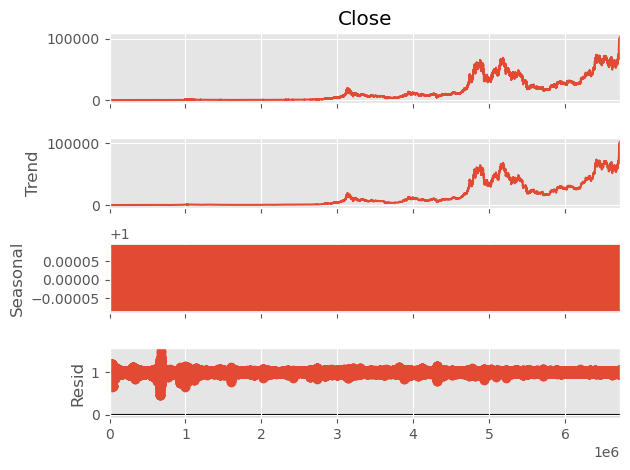

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)

# Visualiza los componentes: tendencia, estacionalidad y residuo
result.plot()
plt.show()

* Tendencia: Bitcoin ha mostrado un fuerte crecimiento a largo plazo, con grandes aumentos en los últimos años. La curva de tendencia muestra una apreciación significativam aunque también hay señales de comportamiento más estable o de consolidación en los periodos más recientes.

* Estacionalidad: Existen patrones estacionales claros, con picos y valles que pueden estar ligados a eventos recurrentes como halvings o el comportamiento del mercado durante ciertas épocas del año.

* Residuos: El componente residual revela la volatilidad inherente de Bitcoin, que es un activo extremadamente sensible a cambios externos, como noticias, decisiones de política económica o regulatoria, y otros eventos inesperados.

📌Paso 4: Modelado de Predicción de Precios

1. Preparación de los datos para el modelado:

Si quieres predecir el precio de Bitcoin en el futuro, puedes usar una ventana deslizante de 1 hora (por ejemplo, usando las últimas 60 observaciones).

In [133]:
# Usamos precios de apertura, cierre, máximo, mínimo y volumen para predecir el precio
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Crear las características y el objetivo
x = df[features]
y = df[target]

# División en entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

2. Modelo ARIMA (AutoRegressive Integrated Moving Average):

    El modelo ARIMA es adecuado para series temporales. Primero, verificamos si la serie es estacionaria. Para ello, utilizamos la prueba de Dickey-Fuller.

In [134]:
from statsmodels.tsa.stattools import adfuller

# Diferenciar la serie para reducir cálculos intensivos en memoria
diff_data = df['Close'].diff().dropna()

# Ejecutar la prueba de Dickey-Fuller en la serie diferenciada
result = adfuller(diff_data.tail(100000))  # Usar los últimos 100,000 registros

print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]}')

# Si el valor p es mayor que 0.05, la serie no es estacionaria y debes diferenciarla.

Estadístico ADF: -64.41370441172789
Valor p: 0.0


La serie diferenciada es estacionaria. Esto significa que, después de aplicar la diferencia (diferenciar una vez), la serie no tiene tendencia y su media y varianza son constantes a lo largo del tiempo.

Por lo que ahora podemos continuamos con el modelo ARIMA

In [135]:
from statsmodels.tsa.arima.model import ARIMA

# Usa un subconjunto de datos (últimos 100,000 registros) #si trabajas en la nube, o tienes un buen soporte en RAM puedes usar todo el set de datos
#subset = df['Close'].tail(100000)
subset = df['Close'].tail(100000)

# Ajustar el modelo ARIMA
model = ARIMA(subset, order=(5,1,0))  
model_fit = model.fit()

# Realiza las predicciones
forecast = model_fit.forecast(steps=30)
print(f'Predicciones: {forecast}')


Predicciones: 100000    99967.055669
100001    99967.037585
100002    99966.304100
100003    99966.093547
100004    99966.009575
100005    99966.024728
100006    99966.033525
100007    99966.038166
100008    99966.038806
100009    99966.038719
100010    99966.038536
100011    99966.038476
100012    99966.038463
100013    99966.038466
100014    99966.038469
100015    99966.038470
100016    99966.038470
100017    99966.038470
100018    99966.038470
100019    99966.038470
100020    99966.038470
100021    99966.038470
100022    99966.038470
100023    99966.038470
100024    99966.038470
100025    99966.038470
100026    99966.038470
100027    99966.038470
100028    99966.038470
100029    99966.038470
Name: predicted_mean, dtype: float64


3. Evaluación del modelo: Si has dividido los datos en conjunto de entrenamiento y prueba, evalúa el modelo usando RMSE.

In [136]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predicción para el conjunto de prueba
y_pred = model_fit.predict(start=len(x_train), end=len(x_train)+len(x_test)-1, typ='levels')

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 64974.80834630871


📌 Paso 5: Visualización de Resultados

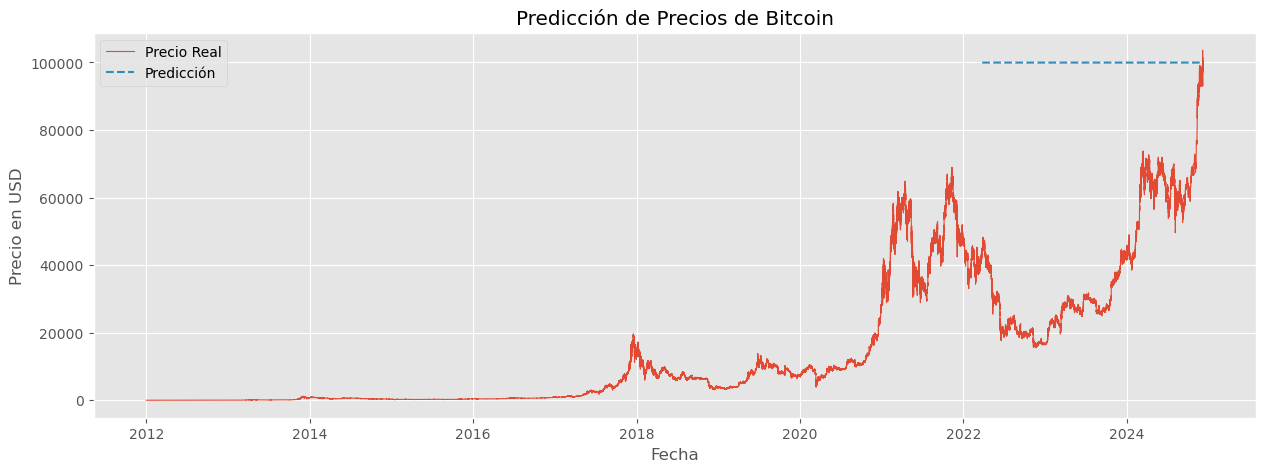

In [137]:
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['Close'], label='Precio Real', linewidth = 0.8)
plt.plot(df['Timestamp'].iloc[len(x_train):], y_pred, label='Predicción', linestyle='--')
plt.title('Predicción de Precios de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.grid(True)
plt.show()

Problemas actuales: El modelo ARIMA no está capturando bien la complejidad de los precios de Bitcoin, como su alta volatilidad y patrones no lineales. Esto se refleja en las predicciones constantes y un RMSE elevado.

Siguiente paso: Ajustar el modelo o explorar alternativas más avanzadas, como SARIMA o modelos basados en aprendizaje profundo, para mejorar la precisión de las predicciones y reflejar mejor los patrones históricos de Bitcoin.

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar un modelo SARIMA con estacionalidad
model = SARIMAX(subset, order=(5, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30) #Hacemos una proyección para los próximos 30 días.

In [139]:
subset = df[['Timestamp', 'Close']].tail(100000)

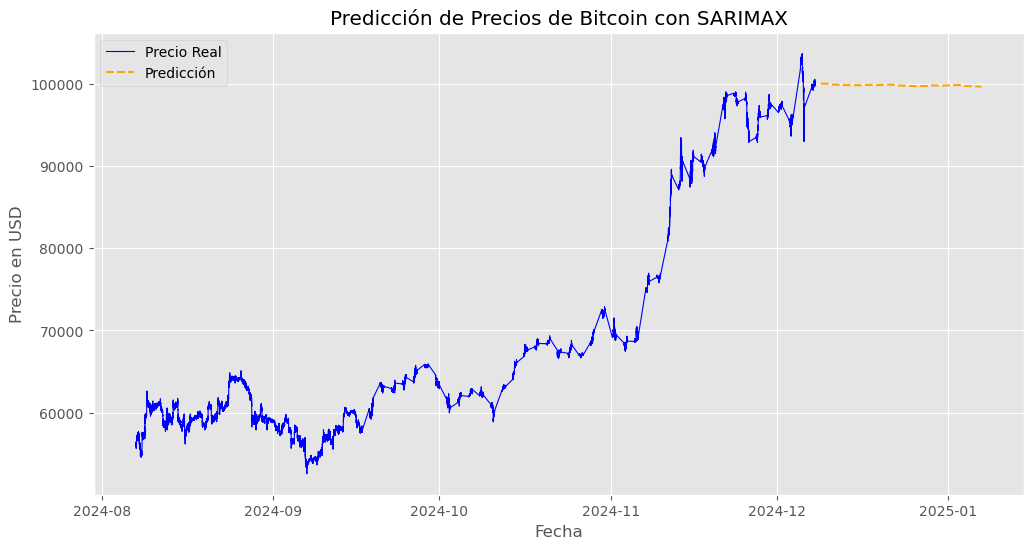

In [140]:
# Asegúrate de que 'Timestamp' esté en formato datetime
subset['Timestamp'] = pd.to_datetime(subset['Timestamp'])

# Crear las fechas futuras para las predicciones
last_date = subset['Timestamp'].iloc[-1]  # Última fecha del subconjunto
future_dates = pd.date_range(start=last_date, periods=len(forecast)+1, freq='D')[1:]

# Graficar los datos reales y las predicciones con fechas correctas
plt.figure(figsize=(12, 6))
plt.plot(subset['Timestamp'], subset['Close'], label='Precio Real', color='blue', linewidth = 0.8)
plt.plot(future_dates, forecast, label='Predicción', color='orange', linestyle='--')
plt.title('Predicción de Precios de Bitcoin con SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.show()

Análisis del Gráfico de Predicción de Precios de Bitcoin con SARIMAX:

1. Datos Reales (Línea Azul):

* La línea azul muestra el comportamiento histórico del precio de Bitcoin, con alta volatilidad y una tendencia alcista significativa desde agosto de 2024 hasta diciembre de 2024.
Este patrón refleja el carácter especulativo del activo, con fluctuaciones abruptas.

2. Predicciones (Línea Naranja Discontinua):

* El modelo SARIMAX proyecta una estabilización del precio alrededor de los 100,000 USD en los próximos 30 días.
Las predicciones son lineales y no reflejan la alta volatilidad observada en los datos reales.

3. Limitaciones del Modelo: 

* Falta de volatilidad en las predicciones: El modelo no captura las fluctuaciones típicas del mercado de Bitcoin, lo que sugiere que los parámetros del modelo (orden y estacionalidad) pueden no ser óptimos para este tipo de datos.
* Posible sobreajuste: El modelo parece confiar más en la tendencia reciente que en la naturaleza dinámica del mercado.

Por lo que se concluye, según el modelo de SARIMAX una estabilización del precio de BITCOIN a corto plazo, pero no refleja adecuadamente la volatilidad característica del activo.


## Diagnosticar el modelo

* Analiza los residuos (errores) del modelo para verificar si son ruido blanco (es decir, no tienen patrones detectables). Esto es crucial para asegurarte de que el modelo está capturando toda la información de la serie.

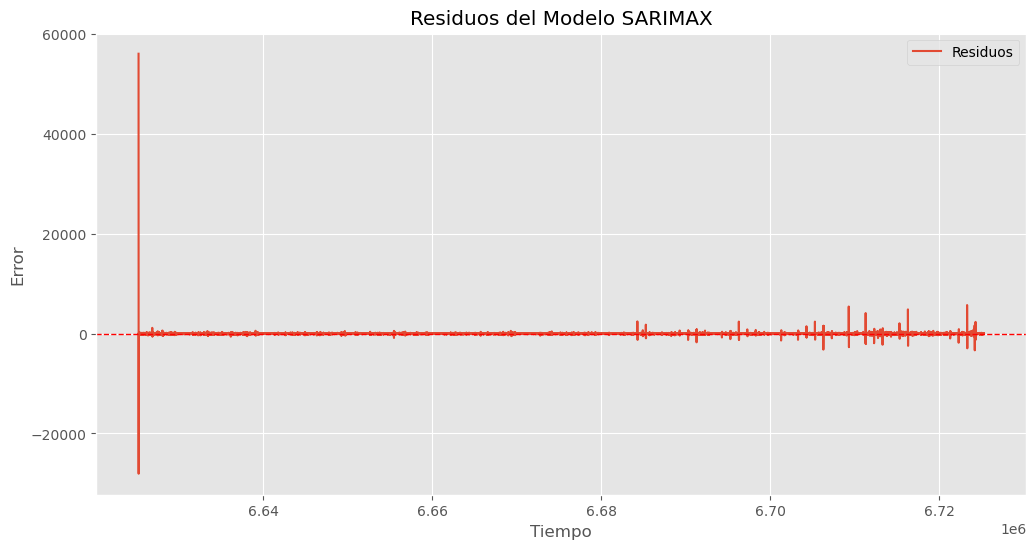

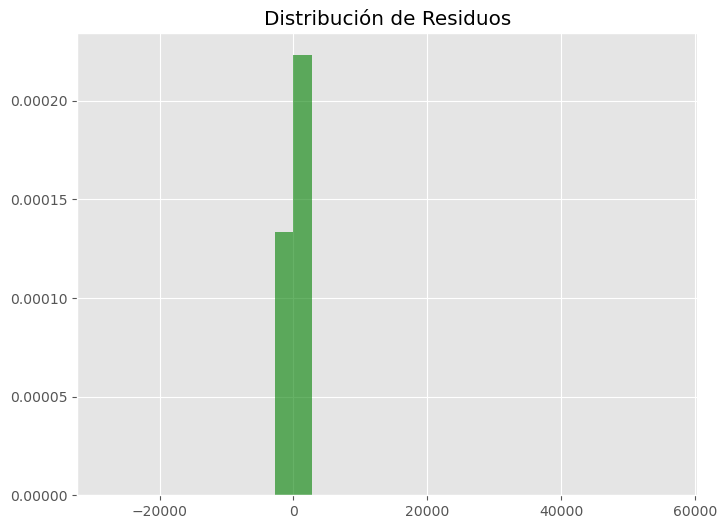

In [141]:
# Residuos del modelo
residuals = model_fit.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuos')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.title('Residuos del Modelo SARIMAX')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribución de Residuos')
plt.show()

* La gráfica de los residuos del modelo SARIMAX muestra un pico inicial atípico que el modelo no ajustó bien, seguido de una distribución uniforme alrededor de cero, indicando un buen ajuste general. Sin embargo, errores consistentes hacia el final sugieren insuficiencia en capturar fluctuaciones recientes, por lo que el valor atípico inicial debería investigarse.

* El histograma de la distribución de los residuos muestra que la mayoría de los errores están agrupados cerca de cero, por lo nos da a entender que el modelo SARIMAX logra capturar en buena medida el comportamiento general de la serie temporal.

📝Conclusión general:

El modelo SARIMAX parece ajustarse bien al comportamiento promedio de la serie, con residuos concentrados cerca de cero. No obstante, los valores atípicos detectados al inicio y las colas extendidas en el histograma sugieren que el modelo podría mejorarse para capturar mejor las fluctuaciones extremas y eventos raros. Una posible solución sería probar modelos más robustos o transformaciones adicionales en los datos para mitigar estos efectos.